In [1]:
# Ventana de tiempo prepandemia 
import pandas as pd  # Pandas proporciona estructuras de datos y herramientas para el análisis de datos.
import seaborn as sns  # Seaborn es una biblioteca de visualización de datos basada en matplotlib.
import matplotlib.pyplot as plt  # Matplotlib es una biblioteca de gráficos 2D que produce figuras de calidad de publicación.
from pathlib import Path  # Pathlib ofrece clases para manejar rutas de archivos de manera orientada a objetos.
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import numpy as np
import os  # La biblioteca os permite interactuar con el sistema operativo.

In [2]:
s_path = Path.cwd()  # Obtiene el directorio de trabajo actual como un objeto Path.
s_prt_path = s_path.parent/'..'/'Datasets' # Accede al directorio padre del directorio actual. Utilizamos '..' para subir un nivel en la jerarquía de directorios.
ruta_carpeta_atras = s_prt_path.resolve() # Normalizamos la ruta para resolver cualquier ruta relativa
ruta_csv = os.path.join(s_prt_path,'Data_XM.csv')  # Crea una ruta al archivo CSV en el directorio padre.
df_DataModel= pd.read_csv(ruta_csv)  # Lee el archivo CSV en un DataFrame de pandas.

In [3]:
df_DataModel['Date'] = pd.to_datetime(df_DataModel['Date'])  # Convierte la columna 'Date' a tipo datetime.
df_DataModel.drop('Unnamed: 0', axis=1, inplace=True)  # Elimina la columna 'Unnamed: 0'.

In [4]:
df_DataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3013 non-null   datetime64[ns]
 1   Demanda    3013 non-null   float64       
 2   VolUtil    3013 non-null   float64       
 3   Aportes    3013 non-null   float64       
 4   PrecioB    3013 non-null   float64       
 5   PrecioO    3013 non-null   float64       
 6   DispTer    3013 non-null   float64       
 7   DispNoTer  3013 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 188.4 KB


In [5]:
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time = pd.to_datetime('2016-01-01')
end_time = pd.to_datetime('2019-03-01')

In [6]:
# Filtra el DataFrame
filtered_df = df_DataModel[df_DataModel['Date'].between(start_time, end_time)]

In [7]:
# Convertir la columna de fecha a múltiples columnas numéricas
filtered_df['year'] = filtered_df['Date'].dt.year
filtered_df['month'] = filtered_df['Date'].dt.month
filtered_df['day'] = filtered_df['Date'].dt.day
filtered_df = filtered_df.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_9412\256231009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_9412\256231009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_9412\256231009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [8]:
filtered_df.head(-1)

,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer,year,month,day
0,5.885745e+06,1.055541e+10,63496200.0,407.565972,414.206983,3.978219e+06,8.762403e+06,2016,1,1
1,6.352403e+06,1.053737e+10,55776100.0,407.627913,418.642247,3.987585e+06,8.949453e+06,2016,1,2
2,6.285871e+06,1.052841e+10,61744800.0,499.329203,426.290040,3.930220e+06,8.916347e+06,2016,1,3
3,7.226923e+06,1.050766e+10,70137500.0,535.140967,414.717455,3.882154e+06,9.002401e+06,2016,1,4
4,7.485122e+06,1.047468e+10,64121400.0,573.129733,427.959078,3.891292e+06,8.855396e+06,2016,1,5
...,...,...,...,...,...,...,...,...,...,...
1150,7.122057e+06,8.644510e+09,87179100.0,322.590895,370.304514,4.224538e+06,9.659271e+06,2019,2,24
1151,8.137477e+06,8.613842e+09,88485100.0,361.728695,371.224236,4.263101e+06,9.263221e+06,2019,2,25
1152,8.239534e+06,8.559566e+09,84367800.0,292.077995,358.720625,4.178875e+06,9.031502e+06,2019,2,26
1153,8.274899e+06,8.510944e+09,93936600.0,338.385517,362.446310,4.047174e+06,9.017892e+06,2019,2,27


In [9]:
# Preparar los datos
X = filtered_df.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'
y = filtered_df['PrecioB']  # la columna 'PrecioB'

In [10]:
print(X)

           Demanda       VolUtil     Aportes     PrecioO       DispTer  \
0     5.885745e+06  1.055541e+10  63496200.0  414.206983  3.978219e+06   
1     6.352403e+06  1.053737e+10  55776100.0  418.642247  3.987585e+06   
2     6.285871e+06  1.052841e+10  61744800.0  426.290040  3.930220e+06   
3     7.226923e+06  1.050766e+10  70137500.0  414.717455  3.882154e+06   
4     7.485122e+06  1.047468e+10  64121400.0  427.959078  3.891292e+06   
...            ...           ...         ...         ...           ...   
1151  8.137477e+06  8.613842e+09  88485100.0  371.224236  4.263101e+06   
1152  8.239534e+06  8.559566e+09  84367800.0  358.720625  4.178875e+06   
1153  8.274899e+06  8.510944e+09  93936600.0  362.446310  4.047174e+06   
1154  8.316201e+06  8.457132e+09  91820500.0  360.840755  4.060981e+06   
1155  8.334235e+06  8.391268e+09  80952600.0  370.978831  4.361869e+06   

         DispNoTer  year  month  day  
0     8.762403e+06  2016      1    1  
1     8.949453e+06  2016      1  

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),

                            },cv=5, scoring='neg_root_mean_squared_error',verbose=1,n_jobs=-1
                           )

In [13]:
# Entrenar el modelo
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='neg_root_mean_squared_error', verbose=1)

In [14]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

Mejores hiperparámetros: {'max_features': 0.6000000000000002, 'n_estimators': 65}


In [15]:
# Obtener el mejor score
best_score = grid_search.best_score_
print(f'Mejor score: {best_score}')

Mejor score: -25.501035658045723


In [16]:
grid_search.cv_results_

{'mean_fit_time': array([0.02096291, 0.04625907, 0.05923715, 0.06159763, 0.08233891,
        0.12247138, 0.1086338 , 0.13025713, 0.12112269, 0.16655641,
        0.1620389 , 0.14539852, 0.16670041, 0.1787302 , 0.17477231,
        0.21704969, 0.23629565, 0.26302843, 0.28507619, 0.01785564,
        0.0295867 , 0.04532676, 0.05225883, 0.0762569 , 0.07548776,
        0.08992033, 0.18089051, 0.17598767, 0.12865262, 0.21772137,
        0.19592037, 0.16302991, 0.22768221, 0.18791165, 0.28145356,
        0.21120458, 0.24439425, 0.26401544, 0.01533566, 0.0318675 ,
        0.04036064, 0.06471295, 0.06859298, 0.11776128, 0.1064559 ,
        0.10101075, 0.11145005, 0.12500172, 0.13418407, 0.15971141,
        0.18688455, 0.23213868, 0.19580345, 0.23674808, 0.22711744,
        0.26614866, 0.36266718, 0.01773696, 0.0342875 , 0.04581923,
        0.06144781, 0.07669702, 0.11118302, 0.14199963, 0.1703826 ,
        0.14515252, 0.18506632, 0.16128836, 0.18378882, 0.24252729,
        0.26005549, 0.22602606,

In [17]:
# Crear el modelo de Random Forest con los mejores hiperparámetros
best_model = RandomForestRegressor(n_estimators=65, max_features=0.6, random_state=42)

In [18]:
# Entrenar el modelo
best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.6, n_estimators=65, random_state=42)

In [19]:
# Hacer predicciones con el conjunto de prueba
predictions = best_model.predict(X_test)

In [20]:
# Calcular el RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

RMSE: 23.697712002472954


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
# Calcular el MAE
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

MAE: 14.518013883841725


In [22]:
# Calcular el R^2
r2 = r2_score(y_test, predictions)
print(f'R^2: {r2}')

R^2: 0.981611336579479


In [23]:
# Calcular los residuos
residuos = y_test - predictions

In [24]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5)

In [25]:
# Calcular las medias y desviaciones estándar de los scores de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

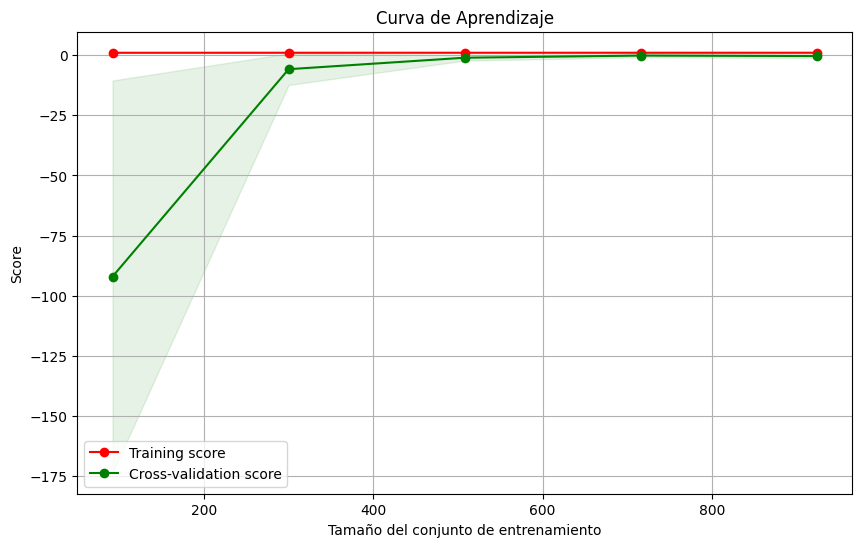

In [26]:
# Crear el gráfico
plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Score')
plt.title('Curva de Aprendizaje')
plt.legend(loc="best")
plt.grid()
plt.show()

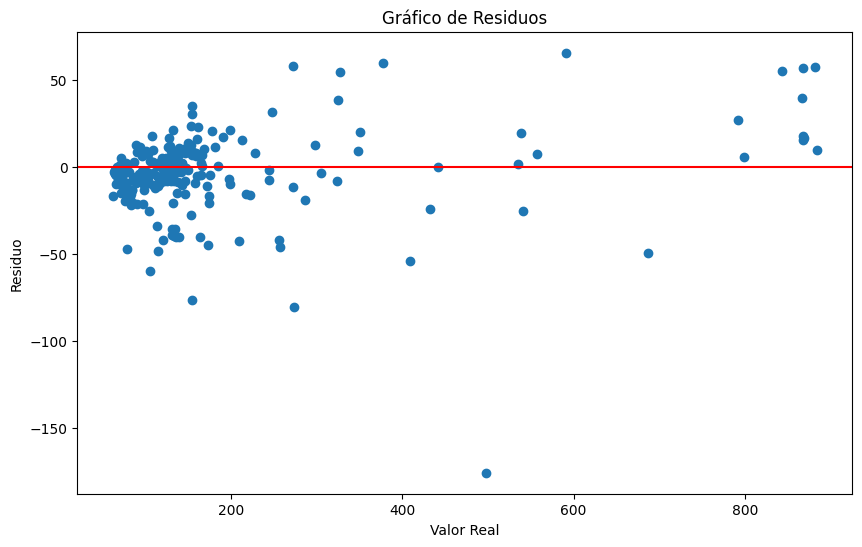

In [27]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuos)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

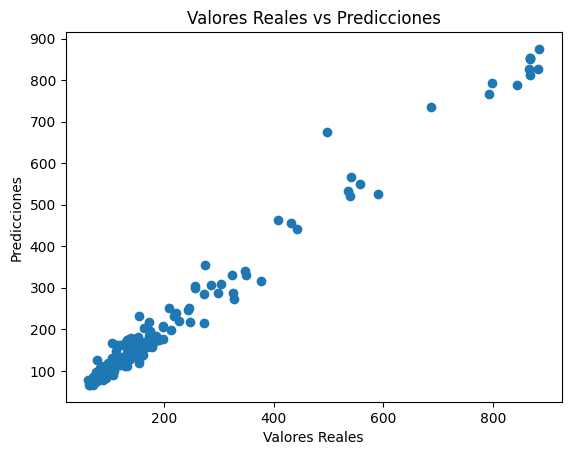

In [28]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

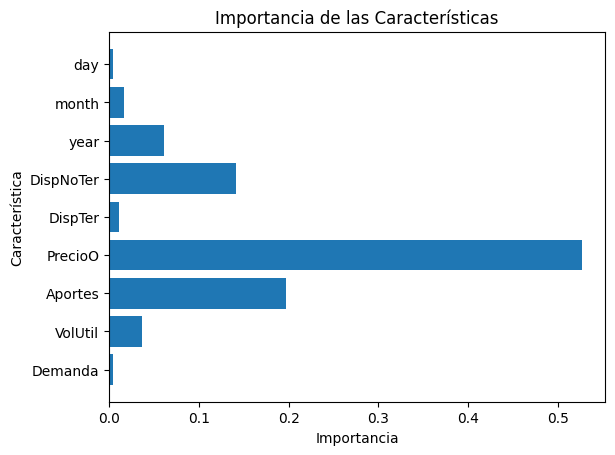

In [29]:
#Importancia de las características: 
importances = best_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()

In [30]:
#Predicciones entre 2022 a 2024
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time_future = pd.to_datetime('2019-03-02')
end_time_future = pd.to_datetime('2024-02-28')

In [31]:
# Filtra el DataFrame
df_future = df_DataModel[df_DataModel['Date'].between(start_time_future, end_time_future)]

In [32]:
precioB_future = df_future['PrecioB']  # la columna 'PrecioB'

In [33]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 1156 to 2980
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1825 non-null   datetime64[ns]
 1   Demanda    1825 non-null   float64       
 2   VolUtil    1825 non-null   float64       
 3   Aportes    1825 non-null   float64       
 4   PrecioB    1825 non-null   float64       
 5   PrecioO    1825 non-null   float64       
 6   DispTer    1825 non-null   float64       
 7   DispNoTer  1825 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 128.3 KB


In [34]:
# Convertir la columna de fecha a múltiples columnas numéricas
df_future['year'] = df_future['Date'].dt.year
df_future['month'] = df_future['Date'].dt.month
df_future['day'] = df_future['Date'].dt.day
df_future = df_future.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_9412\4289330071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['year'] = df_future['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_9412\4289330071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['month'] = df_future['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_9412\4289330071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [35]:
df_future2 = df_future.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'

In [36]:
df_future2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 1156 to 2980
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    1825 non-null   float64
 1   VolUtil    1825 non-null   float64
 2   Aportes    1825 non-null   float64
 3   PrecioO    1825 non-null   float64
 4   DispTer    1825 non-null   float64
 5   DispNoTer  1825 non-null   float64
 6   year       1825 non-null   int32  
 7   month      1825 non-null   int32  
 8   day        1825 non-null   int32  
dtypes: float64(6), int32(3)
memory usage: 121.2 KB


In [37]:
predicciones_futuras = best_model.predict(df_future2)

In [38]:
print(f'Las predicciones de PrecioB para los datos futuros son: {predicciones_futuras}')

Las predicciones de PrecioB para los datos futuros son: [360.85644603 346.88598346 326.89914323 ... 536.55848538 536.38133985
 548.00811195]


In [39]:
# Crear un nuevo DataFrame con las predicciones y las columnas de fecha
df_predicciones = pd.DataFrame({
    'year': df_future['year'],
    'month': df_future['month'],
    'day': df_future['day'],
    'Prediccion_PrecioB': predicciones_futuras
})

In [40]:
print(df_predicciones)

      year  month  day  Prediccion_PrecioB
1156  2019      3    2          360.856446
1157  2019      3    3          346.885983
1158  2019      3    4          326.899143
1159  2019      3    5          306.521662
1160  2019      3    6          322.022687
...    ...    ...  ...                 ...
2976  2024      2   24          541.504271
2977  2024      2   25          533.587940
2978  2024      2   26          536.558485
2979  2024      2   27          536.381340
2980  2024      2   28          548.008112

[1825 rows x 4 columns]


In [42]:
precio_real = df_DataModel[df_DataModel['Date'] == '2019-03-2']
print(precio_real)

           Date       Demanda       VolUtil      Aportes    PrecioB  \
1156 2019-03-02  7.841278e+06  8.365556e+09  102977300.0  333.57139   

         PrecioO      DispTer     DispNoTer  
1156  378.917146  4284013.875  9.156821e+06  


In [43]:
# Calcular el RMSE
rmse_future = mean_squared_error(precioB_future, predicciones_futuras, squared=False)
print(f'RMSE: {rmse_future}')

RMSE: 186.13003777284047


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
# Calcular el R^2
r2_future = r2_score(precioB_future, predicciones_futuras)
print(f'R^2: {r2_future}')

R^2: 0.2748425024787293


In [45]:
# Calcular los residuos
residuos_future = precioB_future - predicciones_futuras

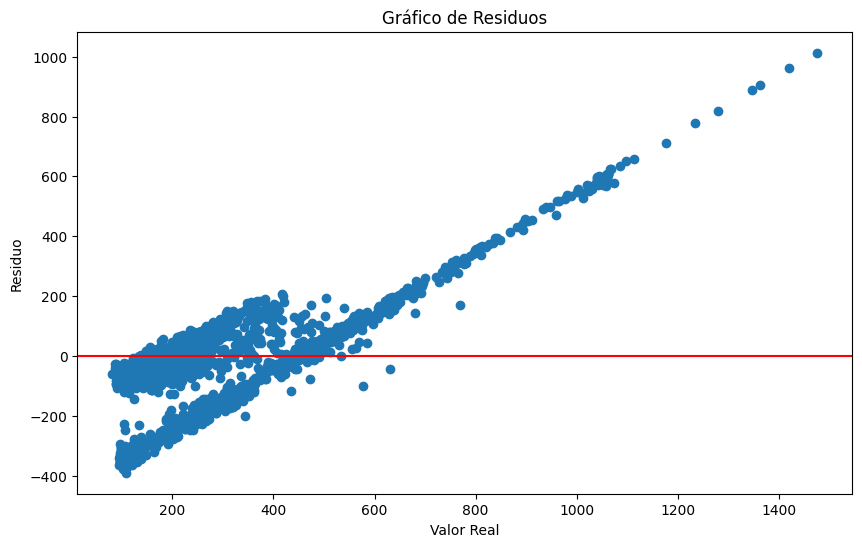

In [46]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(precioB_future, residuos_future)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

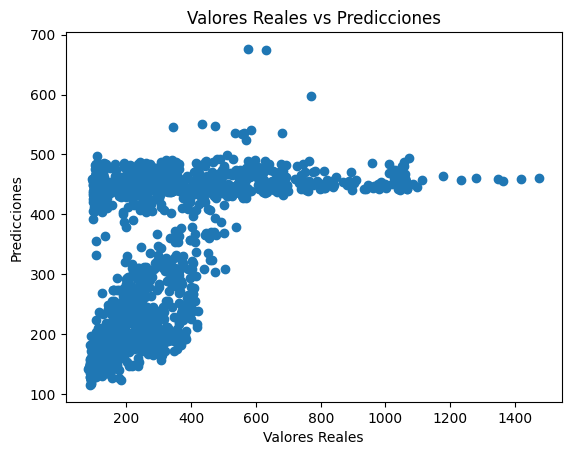

In [47]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(precioB_future, predicciones_futuras)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

In [49]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 1156 to 2980
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    1825 non-null   float64
 1   VolUtil    1825 non-null   float64
 2   Aportes    1825 non-null   float64
 3   PrecioB    1825 non-null   float64
 4   PrecioO    1825 non-null   float64
 5   DispTer    1825 non-null   float64
 6   DispNoTer  1825 non-null   float64
 7   year       1825 non-null   int32  
 8   month      1825 non-null   int32  
 9   day        1825 non-null   int32  
dtypes: float64(7), int32(3)
memory usage: 135.4 KB


In [52]:
df_predicciones['Date'] = pd.to_datetime(df_predicciones[['year', 'month', 'day']])
df_predicciones = df_predicciones.drop(['year', 'month', 'day'], axis=1)

In [53]:
df_predicciones.head()

,Prediccion_PrecioB,Date
1156,360.856446,2019-03-02
1157,346.885983,2019-03-03
1158,326.899143,2019-03-04
1159,306.521662,2019-03-05
1160,322.022687,2019-03-06


In [56]:
# Añadir 'precioB_future' al DataFrame
df_predicciones= df_predicciones.assign(PrecioB_future=precioB_future)

In [57]:
df_predicciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 1156 to 2980
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Prediccion_PrecioB  1825 non-null   float64       
 1   Date                1825 non-null   datetime64[ns]
 2   PrecioB_future      1825 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 57.0 KB


In [58]:
df_predicciones.head(10)

,Prediccion_PrecioB,Date,PrecioB_future
1156,360.856446,2019-03-02,333.571390
1157,346.885983,2019-03-03,296.653067
1158,326.899143,2019-03-04,322.159620
1159,306.521662,2019-03-05,317.929557
1160,322.022687,2019-03-06,320.651190
1161,344.108042,2019-03-07,307.688698
1162,318.381208,2019-03-08,309.247802
1163,312.676072,2019-03-09,292.158292
1164,290.837586,2019-03-10,272.958432
1165,295.638887,2019-03-11,278.106112


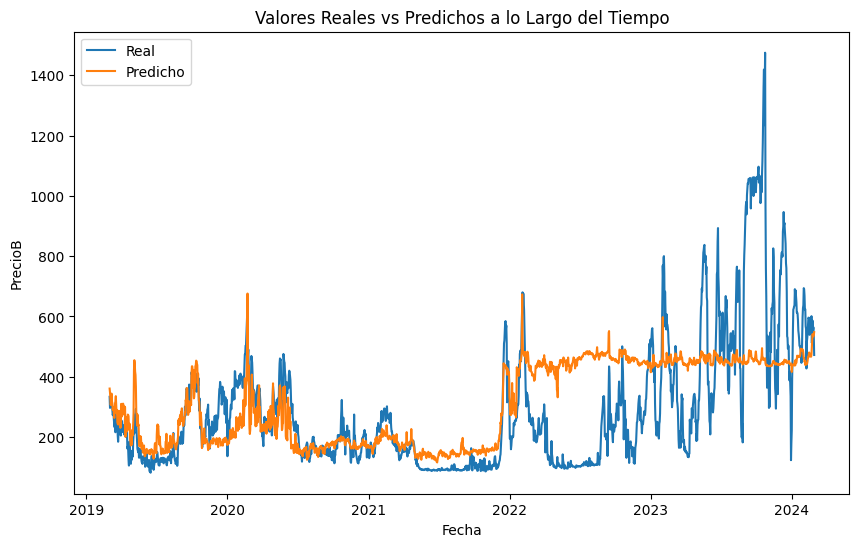

In [59]:
# Crear el gráfico de líneas
plt.figure(figsize=(10,6))
plt.plot(df_predicciones['Date'], df_predicciones['PrecioB_future'], label='Real')
plt.plot(df_predicciones['Date'], df_predicciones['Prediccion_PrecioB'], label='Predicho')
plt.xlabel('Fecha')
plt.ylabel('PrecioB')
plt.title('Valores Reales vs Predichos a lo Largo del Tiempo')
plt.legend()
plt.show()